In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv("C:/Users/57311/Downloads/archive/framingham.csv" , sep=",")

In [64]:
data.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [65]:
data[['BMI','male']].head()

,BMI,male
0,26.97,1
1,28.73,0
2,25.34,1
3,28.58,0
4,23.10,0


<Axes: xlabel='BMI', ylabel='male'>

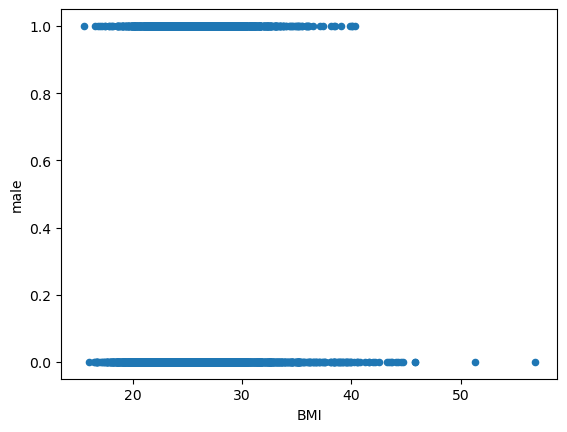

In [66]:
data[['BMI','male']].plot.scatter(x='BMI', y='male')

In [72]:
# pruebas de parametros 
w = 0.09
b = -3.8

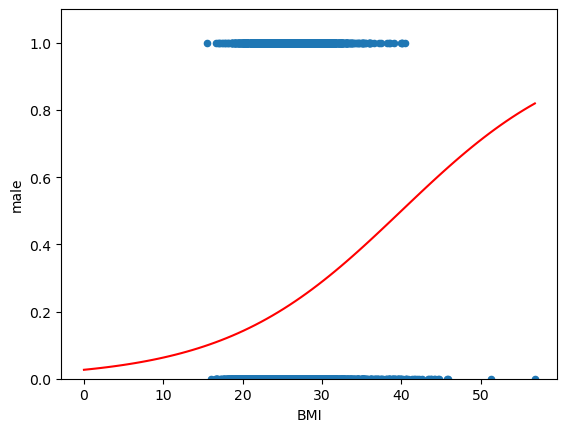

In [71]:
x = np.linspace(0,data['BMI'].max(),80)
y = 1/(1+np.exp(-(w*x+b)))

data.plot.scatter(x='BMI', y='male')
plt.plot(x, y, '-r')
plt.ylim(0,data['male'].max()*1.1)

plt.show()

In [73]:
#calculo de predicciones 
data['sigmoid'] = 1/(1+np.exp(-(data['BMI']*w+b)))

# calculo de la funsion de error 
data['loss_xi'] = -data['male']*np.log(data['sigmoid'])-(1-data['male'])*np.log(1-data['sigmoid'])
cost_j = data['loss_xi'].mean()
cost_j






0.8369666284441193

In [76]:
#hacemos dataframe para calcular el error.
array =np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array,
                  columns = ['w','b'])

#roud para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)


In [77]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [78]:
def sum_error_df(df):
    data['sigmoid'] = 1/(1+np.exp(-(data['BMI']*df['w']+df['b'])))
    data['loss_xi'] = -data['male']*np.log(data['sigmoid'])-(1-data['male'])*np.log(1-data['sigmoid'])
    j_cost = data['loss_xi'].mean()
    return(j_cost) 
    
    
    

In [80]:
df['error'] = df.apply(sum_error_df, axis=1)

In [81]:
df.sort_values(by=['error']).head()

,w,b,error
599,0.10,-3.01,0.689186
687,0.11,-3.13,0.689286
688,0.11,-3.12,0.689292
686,0.11,-3.14,0.689304
689,0.11,-3.11,0.689322


In [83]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [84]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,1.222627,1.218966,1.215310,1.211661,1.208017,1.204380,1.200749,1.197124,1.193506,1.189894,...,0.924161,0.921292,0.918436,0.915591,0.912760,0.909940,0.907134,0.904340,0.901559,0.898790
0.06,1.129303,1.125820,1.122344,1.118875,1.115414,1.111961,1.108516,1.105078,1.101648,1.098226,...,0.854046,0.851530,0.849028,0.846541,0.844068,0.841611,0.839168,0.836740,0.834328,0.831930
0.07,1.041433,1.038171,1.034919,1.031676,1.028443,1.025219,1.022005,1.018800,1.015605,1.012420,...,0.794302,0.792200,0.790115,0.788047,0.785997,0.783963,0.781947,0.779948,0.777967,0.776003
0.08,0.960335,0.957347,0.954370,0.951405,0.948450,0.945508,0.942576,0.939657,0.936749,0.933853,...,0.746590,0.744964,0.743357,0.741769,0.740200,0.738651,0.737122,0.735612,0.734122,0.732652
0.09,0.887490,0.884832,0.882186,0.879554,0.876936,0.874331,0.871740,0.869163,0.866600,0.864052,...,0.712434,0.711338,0.710263,0.709209,0.708176,0.707165,0.706175,0.705206,0.704259,0.703334


In [86]:
import matplotlib as mpl

In [87]:
import matplotlib.pyplot as plt

In [88]:
from mpl_toolkits.mplot3d import Axes3D

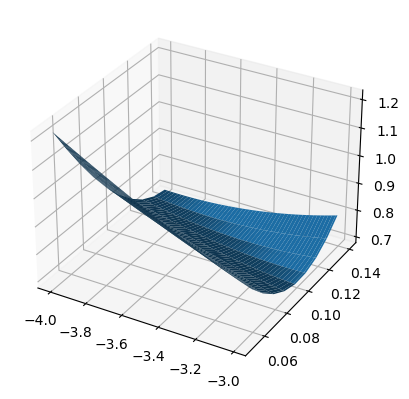

In [90]:
x = df_3d.columns
y = df_3d.index 
x,y = np.meshgrid(x,y)
z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)

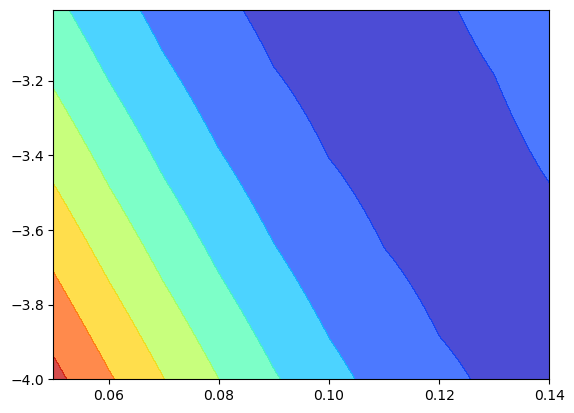

In [91]:
x = df_3d.columns
y = df_3d.index 
x,y = np.meshgrid(x,y)
z=df_3d
plt.contourf(y, x, z, alpha=0.7, cmap=plt.cm.jet)

In [115]:
def delta_j_w(w, b):
    data['sigmoid'] = 1/(1+np.exp(-(data['BMI']*w+b)))
    data['partial_loss'] = (data['sigmoid']-data['male'])*data['BMI']
    derivative = data['partial_loss'].mean()
    return(derivative)

def delta_j_b(w, b):
    data['sigmoid'] = 1/(1+np.exp(-(data['BMI']*w+b)))
    data['partial_loss'] = (data['sigmoid']-data['male'])
    derivative = data['partial_loss'].mean()
    return(derivative)   

In [116]:
w_0 = 0.09
b_0 = -3.57

In [117]:
alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new
    
print(w_0, b_0)

0.09507176807009517 -3.5499069024010605
